In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats 
import warnings
warnings.filterwarnings("ignore")

Burada önceki notebook'ta hazırlanan veri seti bir csv dosyası formatında oluşturuldu ve yorumlamalar yapıldı.

In [2]:
df = pd.read_csv("modified.csv")

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCond,PavedDrive,WoodDeckSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBath,TotalPorch
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,TA,Y,0,2,2008,WD,Normal,208500,3.5,61
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,TA,Y,298,5,2007,WD,Normal,181500,2.5,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,TA,Y,0,9,2008,WD,Normal,223500,3.5,42
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,TA,Y,0,2,2006,WD,Abnorml,140000,2.0,307
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,TA,Y,192,12,2008,WD,Normal,250000,3.5,84


# Zaman Serileri

Belirli bir zaman aralığında bağımlı değişkenin(SalePrice) değişimini gözlemleyeceğimiz bir çalışma yapıldı. Zamana bağlı 3 farklı kolon bulunmaktadır:
- YearBuilt: Evin yapım yılını
- YearRemodAdd: Evin restore edildiği yılı
- YrSold: Evin satıldığı yılı temsil etmektedir.

Aşağıda bu kolonlara karşılık gelen SalePrice değerleri görüntülenmektedir.

In [34]:
df[["YearBuilt","YearRemodAdd", "YrSold", "SalePrice"]]

,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,2003,2003,2008,208500
1,1976,1976,2007,181500
2,2001,2002,2008,223500
3,1915,1970,2006,140000
4,2000,2000,2008,250000
...,...,...,...,...
1454,1999,2000,2007,175000
1455,1978,1988,2010,210000
1456,1941,2006,2010,266500
1457,1950,1996,2010,142125


Bu kolonlar üzerinde işlem yapabilmek için 3 kolonu da kendi içerisinde gruplayıp ortalamalarını aldık ve SalePrice kolonunda o yıllara karşılık gelen bir ortalama değer elde ettik. Sırasıyla bu 3 kolon incelenecektir.

In [7]:
#yıllara göre ortalama alıp gruplar oluşturma
year_built_grouping = df.groupby("YearBuilt").mean()
year_remodel_grouping  = df.groupby("YearRemodAdd").mean()
year_sold_grouping = df.groupby("YrSold").mean()

In [33]:
year_built_grouping[["SalePrice"]]

,SalePrice
YearBuilt,
1872,122000.000000
1875,94000.000000
1880,200619.750000
1882,168000.000000
1885,111250.000000
...,...
2006,253052.348485
2007,255362.734694
2008,348849.130435


YearBuilt değerlerinin SalePrice ile ilişkisi

<AxesSubplot:xlabel='YearBuilt'>

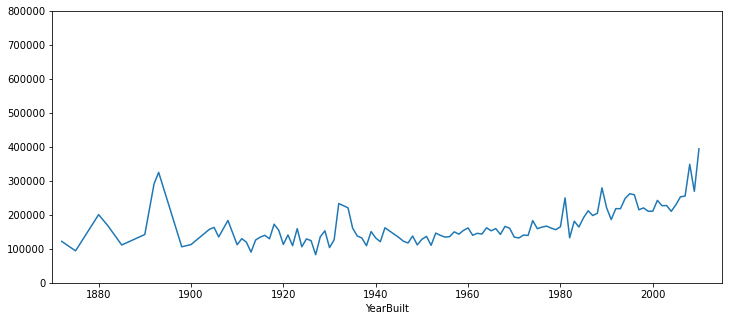

In [9]:
plt.figure(figsize=(12,5))
year_built_grouping["SalePrice"].plot(x=df.YearBuilt, xlim=(1870,2015), ylim=(0,800000))

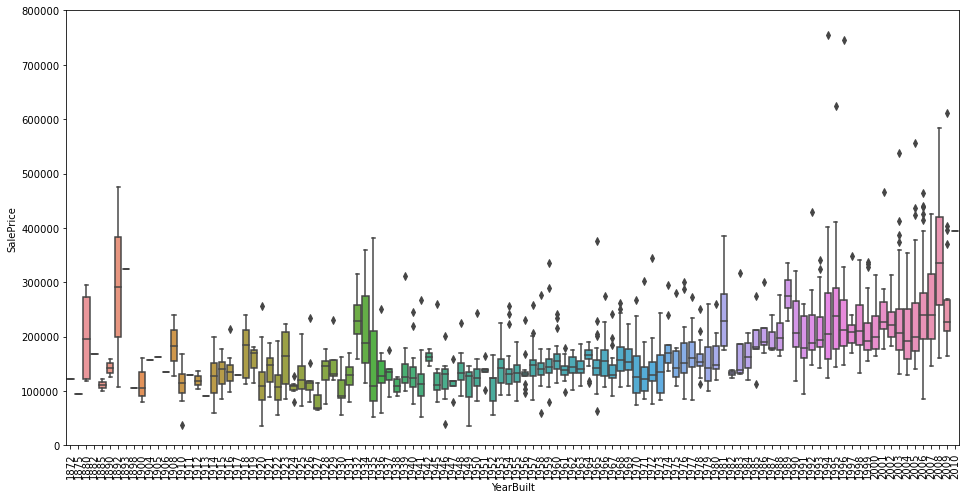

In [10]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [32]:
year_remodel_grouping[["SalePrice"]]

,SalePrice
YearRemodAdd,
1950,117463.056180
1951,129975.000000
1952,110398.600000
1953,147640.000000
1954,121142.857143
...,...
2006,229471.134021
2007,225571.346667
2008,269709.100000


Aşağıdaki gösterimde YearBuilt ve YearRemodAdd birlikte çizdirilmiştir. Buna göre restorasyonun satış fiyatına doğrudan etkisi olduğunu söyleyebiliriz.

<AxesSubplot:xlabel='YearRemodAdd'>

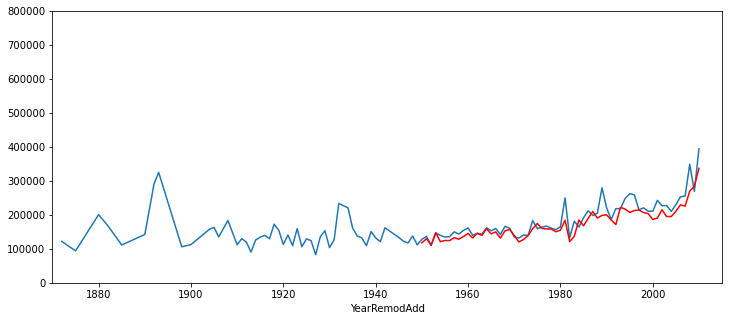

In [12]:
#timeplot çizdirme
plt.figure(figsize=(12,5))
year_built_grouping["SalePrice"].plot(x=df.YearBuilt, xlim=(1870,2015), ylim=(0,800000))
year_remodel_grouping["SalePrice"].plot(x=df.YearRemodAdd, color="red")

Yıllara göre satış 2006 yılında başlamıştır ve son satış bilgisi 2010 yılına kadar uzanmaktadır.

In [13]:
df["YrSold"].value_counts(ascending=False)

2009    338
2007    329
2006    314
2008    303
2010    175
Name: YrSold, dtype: int64

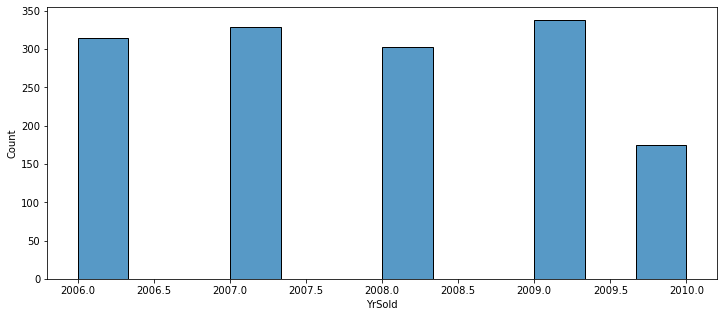

In [14]:
plt.figure(figsize=(12,5))
bx = sns.histplot(x=df["YrSold"])

In [15]:
#Satış yılının SalePrice kolonuna göre gruplandırılması
year_sold_grouping = df.groupby("YrSold").mean()

In [17]:
#Ortalama değerlerin yazdırılması
year_sold_grouping[["SalePrice"]]

,SalePrice
YrSold,
2006,182549.458599
2007,186063.151976
2008,177393.382838
2009,179432.103550
2010,177393.674286


Buradan çıkarılcak sonuç şudur:
- Mavi renkle gösterilmiş YearBuilt grafiği 1950 yılından beri yükseliş trendi göstermektedir.
- Siyah renkle gösterilmiş YrSold grafiği ise 2006 yılından beri düşüş trendi göstermektedir.
- Ev fiyatlarının sürekli artmasına rağmen satış fiyatı ev fiyatlarının çok altındadır.
- Mavi renkli grafiği satın alınacak ürünün fiyatı, siyah renkli grafiği ise alım gücü olarak düşünürsek, satış fiyatı her arttığında alım gücünün düşmesi yüksek enflasyonun varlığını gösterebilir.


<AxesSubplot:xlabel='YrSold'>

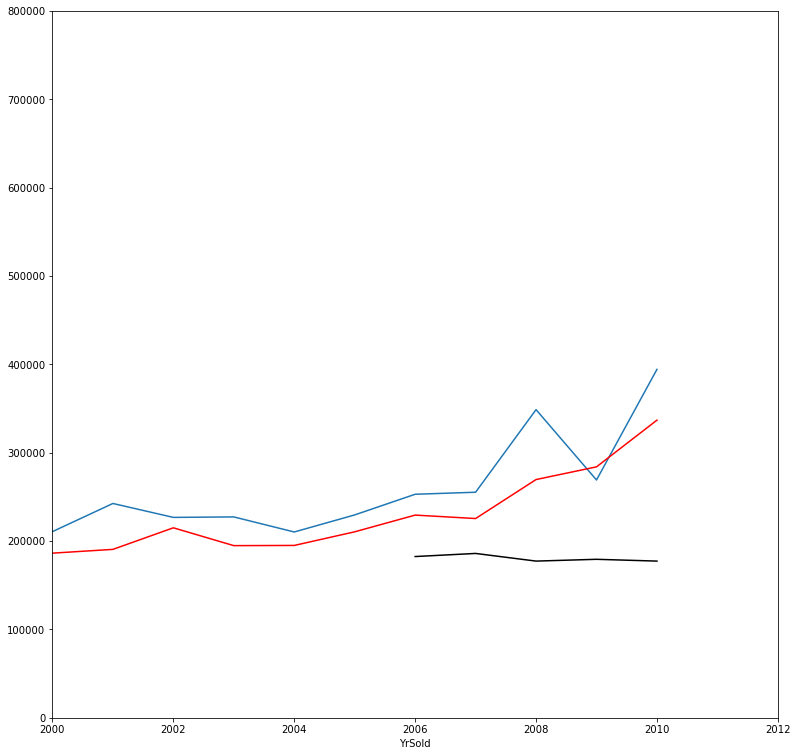

In [54]:
plt.figure(figsize=(13,13))
year_built_grouping["SalePrice"].plot(x=df.YearBuilt, xlim=(2000,2012), ylim=(0,800000))
year_remodel_grouping["SalePrice"].plot(x=df.YearRemodAdd, color="red")
year_sold_grouping["SalePrice"].plot(x=df.YrSold, color="black")

Daha sonra aylara göre satış oranları incelenmiştir.

In [19]:
df[["MoSold","SalePrice","YearBuilt"]]

,MoSold,SalePrice,YearBuilt
0,2,208500,2003
1,5,181500,1976
2,9,223500,2001
3,2,140000,1915
4,12,250000,2000
...,...,...,...
1454,8,175000,1999
1455,2,210000,1978
1456,5,266500,1941
1457,4,142125,1950


In [55]:
#aylara göre gruplama yapılarak ortalama alınması
month_sold_grouping2 = df.groupby("MoSold").mean()

In [21]:
month_sold_grouping2[["SalePrice"]]

,SalePrice
MoSold,
1,183256.258621
2,177882.000000
3,183253.924528
4,171503.262411
5,172330.950739
6,177395.735178
7,186331.192308
8,184651.827869
9,195683.206349


- Burada görüldüğü gibi en çok satış haziran ayında yapılmıştır.
- Kabaca belirtecek olursak kış aylarına doğru satışların düştüğünü, yaz alarına doğru satışların arttığını söyleyebiliriz.

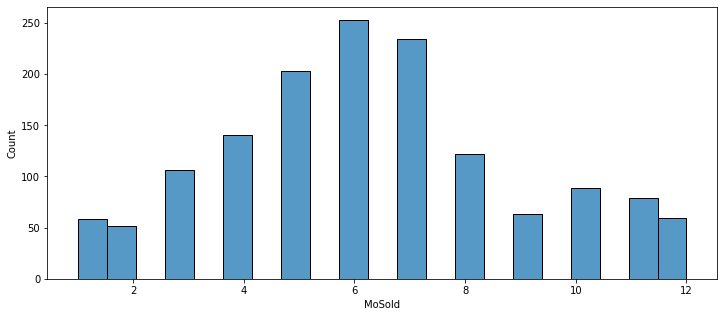

In [22]:
plt.figure(figsize=(12,5))
bx = sns.histplot(x=df["MoSold"])

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

5 gruba ayrıldı, dağılımları var, yaşıa göre fiyat grafiği

Yıllara göre bu çıkarımlar yapıldıktan sonra yıllar gruplanarak bina yaşını belirten BuiltAge adlı kolon oluşturuldu. Bu kolon veri setindeki son yıl olan 2010'dan restore edilmiş bina yaşını çıkararak bulundu. Geri kalan binalar tarihi bina olarak değerlendirildi.

Bu kolon sırasıyla 5 yaş grubundan bina içermektedir:
- Historical: Bina yaşı 50 ve daha fazla
- Eski2: Bina yaşı 50 ve 20 arasında
- Eski1: Bina yaşı 20 ve 10 arasında
- Orta yaşlı: Bina yaşı 10 ve 5 arasında
- Yeni: Bina yaşı 5 ve 0 arasında



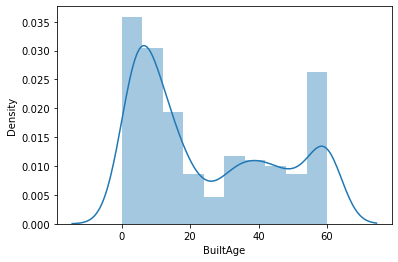

In [24]:
df['BuiltAge'] = 2010 - df['YearRemodAdd']
#df = df.rename(columns={'YearRemodAdd': 'BuiltAge'})
sns.distplot(df['BuiltAge'])
df_historical = df [ df ['BuiltAge'] > 50]
df_old2 = df [ (df ['BuiltAge'] <= 50) & (20 < df ['BuiltAge'])]
df_old1 = df [ (df ['BuiltAge'] <= 20) & (10 < df ['BuiltAge'])]
df_middle = df [ (df ['BuiltAge'] <= 10) & (5 < df ['BuiltAge'])]
df_new = df [ (df ['BuiltAge'] <= 5) & (0 <= df ['BuiltAge'])]

In [56]:
#ev gruplarının salePrice'a göre ortalamalarının alınması
a = df_historical.SalePrice.mean()
b = df_old2.SalePrice.mean()
c = df_old1.SalePrice.mean()
d = df_middle.SalePrice.mean()
e = df_new.SalePrice.mean()

In [57]:
#ortalaması alınan değerlerin bir dictionary'de tutulması
dict ={ "historical" : [a] , "old2" : [b] , "old1" : [c] , "middle" : [d] , "new" : [e]}

Burada evlerin yaşına göre değişen satış fiyatları gözlemlenmektedir. Orta yaşlı evlerin fiyatlarında bir düşüş görülmektedir. Bu yaş aralığındaki evlerin(10 ile 5 yaş arası) fiyatlarını etkileyen başka değişkenler olduğu veya veri setinde bulunmuyorsa emlak piyasasından bağımsız bir durum yaşandığı çıkarımı yapılabilir.

<AxesSubplot:>

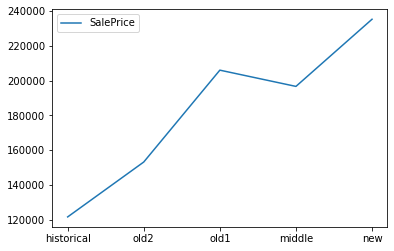

In [27]:
builtAge = pd.DataFrame(dict).T
builtAge = builtAge.rename(columns = {0 :"SalePrice"})
sns.lineplot(data = builtAge)

Evlerin yaş gruplarına göre dağılımı:

<AxesSubplot:xlabel='BuiltAge', ylabel='SalePrice'>

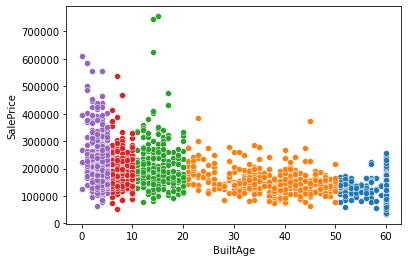

In [28]:
sns.scatterplot(data = df_historical , x= 'BuiltAge' , y ='SalePrice')
sns.scatterplot(data = df_old2 , x= 'BuiltAge' , y ='SalePrice')
sns.scatterplot(data = df_old1 , x= 'BuiltAge' , y ='SalePrice')
sns.scatterplot(data = df_middle , x= 'BuiltAge' , y ='SalePrice')
sns.scatterplot(data = df_new , x= 'BuiltAge' , y ='SalePrice')

Ev fiyatlarının her yıla özel dağılımı:

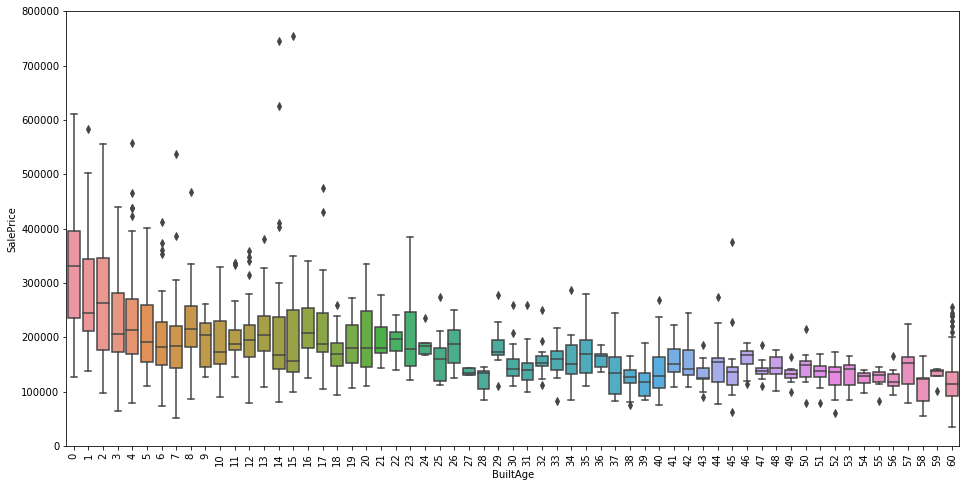

In [29]:
var = "BuiltAge"
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);